# unit 0.1 - introduction to PyTorch and Tensors

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/01-tensors-pytorch.ipynb)

In [1]:
import torch

A vector:


In [2]:
a = torch.Tensor(10)
a

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

A more complex tensor - seems like an image of 4x4 pixels:

In [3]:
a = torch.Tensor(3,4,4)
a
# a[0:2]

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

But what is the first dimension? RGB?

Here is a black/white image - why so?

In [4]:
a = torch.Tensor(5,5)
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

let us now load a "real" image!

In [5]:
import torchvision
ima = torchvision.io.read_image("images/cat.jpg")

these are the image dimensions:

In [6]:
print(ima.shape)

torch.Size([3, 259, 194])


We can now dipslay the image / or plot it!

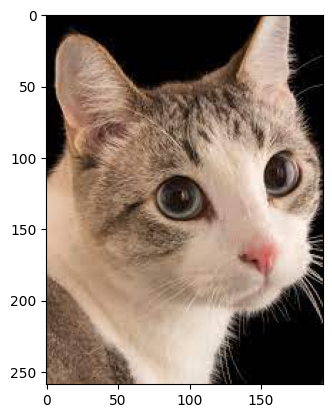

In [7]:
import matplotlib.pyplot as plt
iman = ima.permute(1, 2, 0)
# iman.shape
plt.imshow(iman)